experiments/reclaimable_lines/1280MBLLC/data/zsim.h5
<KeysViewHDF5 ['stats']>


Text(0.5, 19.049999999999997, 'Cycles (millions)')

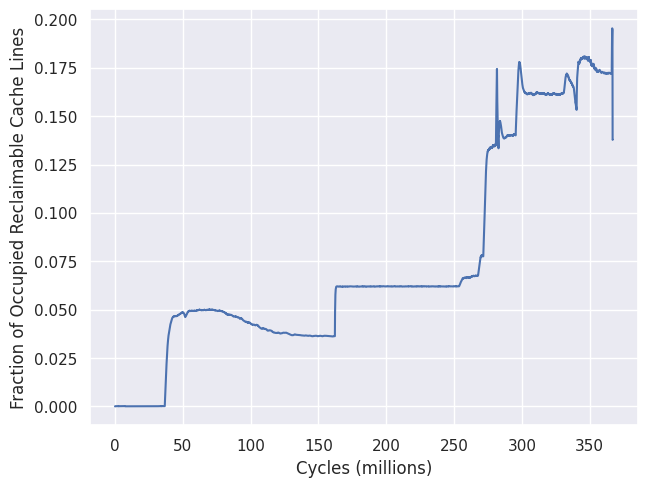

In [9]:
import h5py
import numpy as np
import os
from readable_number import ReadableNumber
import matplotlib.pyplot as plt
import seaborn as sns
rn = ReadableNumber
sns.set_theme()

experiment = "reclaimable_lines"
config = "1280MBLLC"
path = f"experiments/{experiment}/{config}/data/zsim.h5"
print(path)
f = h5py.File(path, 'r')

print(f.keys())

dset = f["stats"]["root"]

num_private_sets = np.sum(dset['l3']['profNonReclaimableLines'], 1)
# numSets*floor(numWays/10) is the number of reclaimable lines
# numSets = (cacheSize/64/numWays)
# numReclaimable = (cacheSize/64/numWays)*floor(numWays/10)
# so when numWays = 20 and cacheSize = 1.25GiB, numReclaimable = 2097152
num_private_sets = np.divide(num_private_sets, 2097152);
phase = 10000/1000000; # x is in millions
x_vals = np.arange(0, num_private_sets.size*phase, phase);

fig, ax = plt.subplots();
ax.plot(x_vals, num_private_sets);

fig.tight_layout();

ax.set_ylabel("Fraction of Occupied Reclaimable Cache Lines");
ax.set_xlabel("Cycles (millions)");